<a href="https://colab.research.google.com/github/anabiax/PyAnaliseDados/blob/main/analiseDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANÁLISE DE MICRODADOS DO ENEM**

In [ ]:
!pip install pandas matplotlib numpy scipy

In [1]:
import pandas as pd   # leitura e manipulacao de dados
import matplotlib.pyplot as plt   # cricao de graficos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!head /content/drive/MyDrive/MICRODADOS_ENEM_2022.csv

In [ ]:
microDadosENEM = pd.read_csv("/content/drive/MyDrive/MICRODADOS_ENEM_2022.csv",
                              sep=';', encoding = "ISO-8859-1")
microDadosENEM.head()

In [ ]:
microDadosENEM  # essa forma mostra todas as linhas no total

In [ ]:
# identificando os nomes das colunas:
microDadosENEM.columns

In [ ]:
microDadosENEM.columns.values

In [ ]:
#Verificando os tipos de dados de cada coluna
microDadosENEM.info()

**ANÁLISE EXPLORATÓRIA DE DADOS**

**Dado** - trata-se do registro de um fato/evento isolado ocorrido. <br>
**Informação** - é a camada de sentido atribuída a um dado.

In [30]:
colunasSelecionadasENEM = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC',
       'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC',
       'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [31]:
microDadosENEMSelecionado = microDadosENEM.filter(items=colunasSelecionadasENEM)
                                             # nome do parâmetro é sempre items

# trabalhar com um df significa que o processamento a partir de então será + rápido

In [ ]:
microDadosENEMSelecionado.head()

In [12]:
microDados100 = microDadosENEMSelecionado[0:100]  # limita a quantidade de linhas

In [ ]:
colunaNomeMunicipioProva = microDadosENEMSelecionado['NO_MUNICIPIO_PROVA']
colunaNomeMunicipioProva

# um novo objeto é atribuído a este resultado qnd extraio uma coluna - faz parte do processamento do pd
# SÉRIE é o nome disso - é como se fosse uma lista com índices no pd

In [ ]:
# saber a distribuicao de alunos por município - retorna uma série contendo as qtd de valores únicos (qts linhas tem em cada)

colunaNomeMunicipioProva.value_counts() # ordena por quantidade
colunaNomeMunicipioProva.value_counts().sort_index() # ordem alfabética

In [ ]:
colunaFaixaEtaria = microDadosENEMSelecionado['TP_FAIXA_ETARIA']
#colunaFaixaEtaria
colunaFaixaEtaria.value_counts().sort_index()

In [ ]:
colunaFaixaEtaria.hist(bins=30) # histograma

In [ ]:
colunaNomeMunicipioEscola = microDados100['NO_MUNICIPIO_ESC']
colunaNomeMunicipioEscola.value_counts()

In [ ]:
colunaRaca = microDadosENEMSelecionado['TP_COR_RACA']
colunaRaca.value_counts()

In [ ]:
distribuicaoRaca = colunaRaca.value_counts()
percentualPessoasPretas = [100 * numeroResultante / distribuicaoRaca.sum() for numeroResultante in distribuicaoRaca] # pego o resultado, divido pelo total (soma dos 5) e multiplica por 100 p/ obter a porcentagem
percentualPessoasPretas

# Leitura: 42,83% das pessoas que fizeram ENEM são pardas
#          41,08% são brancas
#          11,74% são pretas
#          1,90% são amarelas
#          1,86% não declarado
#          0,57 - são indígenas

In [13]:
colunaSexo = microDadosENEMSelecionado['TP_SEXO']

distruibuicaoSexo = colunaSexo.value_counts()
distruibuicaoSexo

percentualSexo = [100 * resultado / distruibuicaoSexo.sum() for resultado in distruibuicaoSexo]
percentualSexo

# Leitura: 61,00% são mulheres
#          38% são homens

[61.00273150552127, 38.99726849447873]

In [37]:
# extrair a info de quantas mulheres negras fizeram o vestiba

sexoFeminino = distruibuicaoSexo[0]
pessoasNegras = distribuicaoRaca[2]

In [38]:
sexoFeminino

2120519

In [39]:
pessoasNegras

408422

In [41]:
# dentro do universo que declararam ser mulheres negras, qual é a porcentagem desta categoria?

percentualMulheresNegras = 100 * pessoasNegras / sexoFeminino
percentualMulheresNegras

19.26047349729005

**Obter as notas de redação do ENEM segundo as declarações de sexo dos candidatos que se inscreveram**
- usando groupBy - agrupo segundo a minha coluna de sexo


In [14]:
colunasSelecionadas = ['TP_SEXO', 'NU_NOTA_REDACAO']

In [18]:
microDadosENEMSexoRedacao = microDadosENEM.filter(items=colunasSelecionadas)

microDadosENEMSexoRedacao = microDadosENEMSexoRedacao.dropna() # remove os NaN

In [ ]:
microDadosENEMSexoRedacao.head()

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').count() # quantidade dos que declararam F e M

A nota máxima é a mesma p/ homens e mulheres?

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').max()

In [ ]:
microDadosENEMSexoRedacao[microDadosENEMSexoRedacao.NU_NOTA_REDACAO > 0].groupby('TP_SEXO').min()  # tirando os que fugiram do tema e os demais casos de nota zerada, a menor nota foi 40. Então o indicador ainda nao foi tão relevante

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').mean() # esse indicador já trouxe a info de que a nota feminina é um pouco maior

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').median()

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').hist()

In [ ]:
microDadosENEMSexoRedacao.groupby('TP_SEXO').describe() # dá a noção do conjunto de dados - + estatístico

**Filtrar por indicadores socioeconômicos filtrando pela redacao e matematica**

In [32]:
colunasSelecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',  'Q001', 'Q002']

In [ ]:
microdadosENEMSelecionado = microDadosENEM.filter(items=colunasSelecionadas)
microdadosENEMSelecionado = microdadosENEMSelecionado.dropna()
microdadosENEMSelecionado.head()

**Q001**- até que série seu pai, ou o homem responsável por você, estudou? <br>
**Q002**- até que série sua mãe, ou a mulher responsável por você, estudou?

In [39]:
# definindo um dicionário p/ visualizar melhor o resultado

q001e002Dicionario = {
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'
}

In [ ]:
microdadosENEMSelecionado.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

In [ ]:
#microdadosENEMSelecionado.Q001

# criar nova coluna no df p/ relacionar a chave ao valor

# inserindo coluna NO_Q001:
microdadosENEMSelecionado['NO_Q001'] = [q001e002Dicionario[resposta] for resposta in microdadosENEMSelecionado.Q001] # essa info vai gerar uma lista e a primeira parte antes do for determina como ela será

# inserindo coluna NO_Q002:
microdadosENEMSelecionado['NO_Q002'] = [q001e002Dicionario[resposta] for resposta in microdadosENEMSelecionado.Q002]


microdadosENEMSelecionado.head()

Comparando distribuição do nível de escolaridade Pai X Mãe no conjunto de dados


In [ ]:
# pai
microdadosENEMSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

# a quantidade de "nao sei" qnd se trata de pais é bem maior
  # - boa parte dos lares no BR são chefiados pela figura materna

In [ ]:
# mae
microdadosENEMSelecionado.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

In [ ]:
# desempenho em matematica de acordo com os dados obtidos acima - pai

microdadosENEMSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

# quem tira a media maior em matematica é quem é filho de pais que tiveram acesso à pós-graduacao
# a media dos candidatos cresce à medida que cresce a escolaridade dos pais

In [ ]:
# desempenho em matematica de acordo com os dados obtidos acima - mãe

microdadosENEMSelecionado.filter(items=['NU_NOTA_MT', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

Olhando o desempenho em redação segundo a escolaridade Pai X Mãe


In [ ]:
# por escolaridade do pai
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
# por escolaridade da mãe
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
q001Redacao = microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
q001Redacao.plot()

In [ ]:
q002Redacao = microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)
q002Redacao.plot()

<Figure size 1000x600 with 0 Axes>

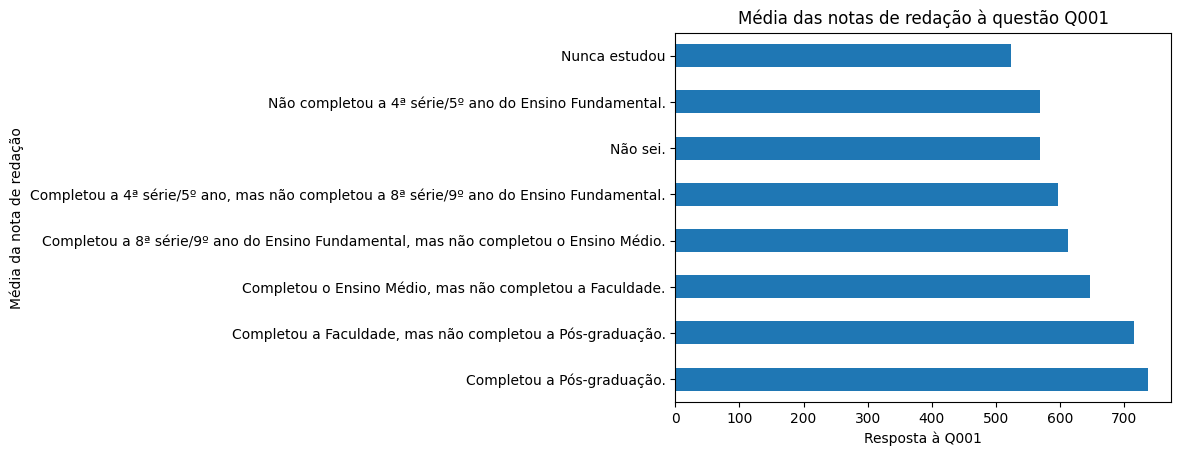

<Figure size 1000x600 with 0 Axes>

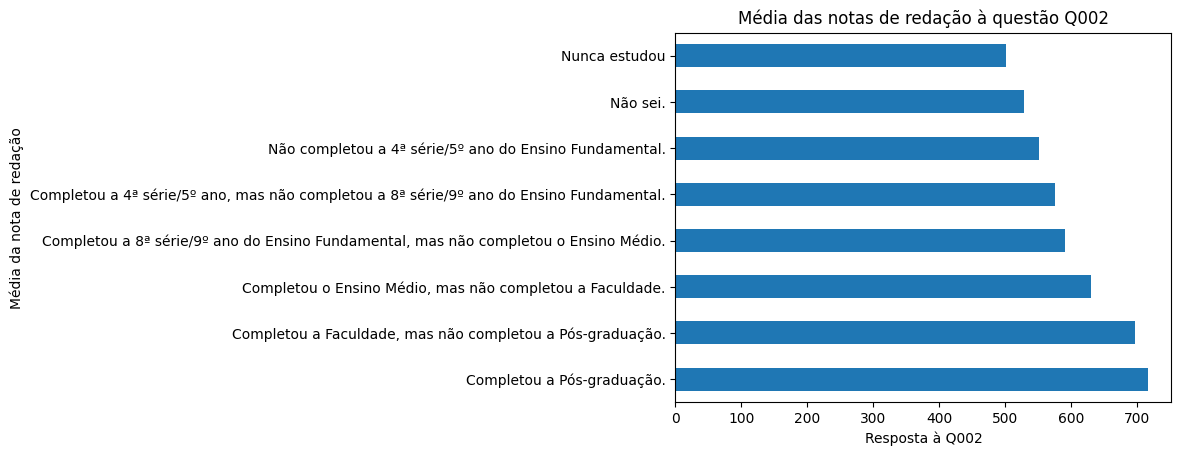

In [62]:
# Plota para a variável q001Redacao
plt.figure(figsize=(10, 6))
q001Redacao.plot(kind='barh', legend=False)
plt.title('Média das notas de redação à questão Q001')
plt.xlabel('Resposta à Q001')
plt.ylabel('Média da nota de redação')
plt.show()

# Plota para a variável q002Redacao
plt.figure(figsize=(10, 6))
q002Redacao.plot(kind='barh', legend=False)
plt.title('Média das notas de redação à questão Q002')
plt.xlabel('Resposta à Q002')
plt.ylabel('Média da nota de redação')
plt.show()

**Essa tendência se mantém se aplicado o indicador de Estado?**

In [63]:
colunasSelecionadas = ['NU_INSCRICAO', 'SG_UF_ESC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q001', 'Q002']

In [64]:
microdadosENEMSelecionado['SG_UF_ESC'] = microDadosENEM.SG_UF_ESC

In [ ]:
microdadosENEMSelecionado = microdadosENEMSelecionado.dropna()
microdadosENEMSelecionado.head()

In [ ]:
microdadosENEMSelecionado.filter(items=['NU_NOTA_REDACAO', 'NO_Q002']).where(microdadosENEMSelecionado.SG_UF_ESC == 'SP').groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)

In [ ]:
microdadosENEMSelecionado.filter(items=['SG_UF_ESC', 'NU_NOTA_REDACAO', 'NO_Q002']).groupby(['SG_UF_ESC', 'NO_Q002']).mean()

<Axes: xlabel='Q002'>

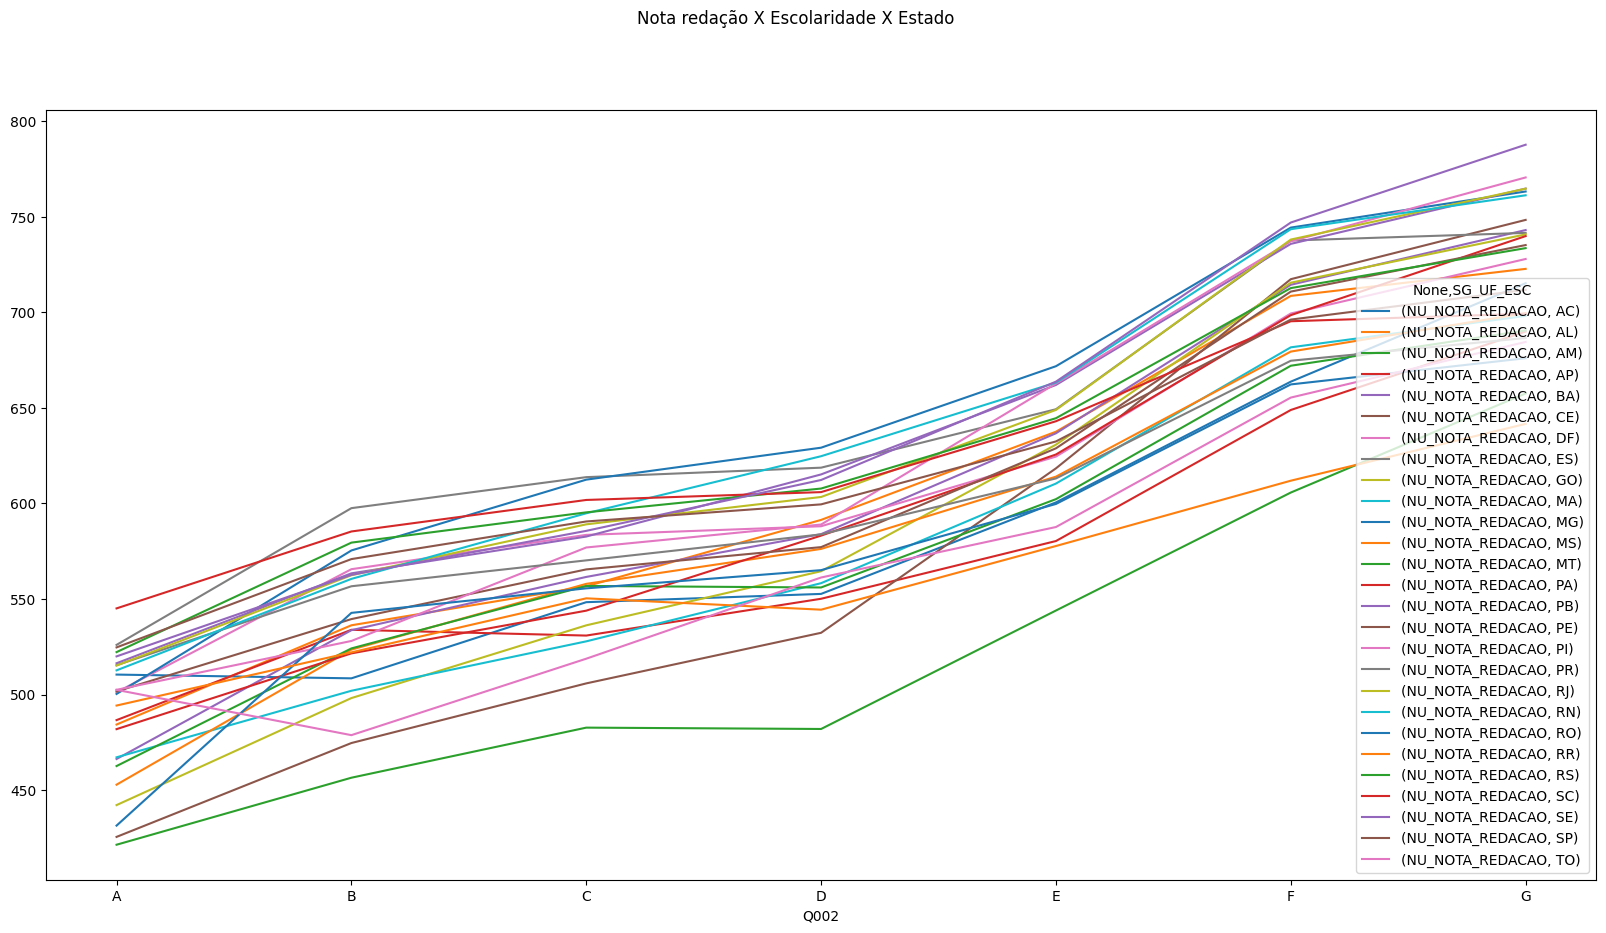

In [82]:
fig, ax = plt.subplots(figsize = (20, 10))
plt.suptitle('Nota redação X Escolaridade X Estado')

microdadosENEMSelecionado.filter(items=['SG_UF_ESC', 'Q002', 'NU_NOTA_REDACAO']).where(microdadosENEMSelecionado.Q002 != 'H').groupby(['Q002', 'SG_UF_ESC']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).unstack().plot(ax=ax)
                                                                                                                                                                                        # unstack separa a informacao por grupos do groupBy

# tendência para o grupo de estados esse tipo de gráfico é útil
# H é o 'Não sei.'